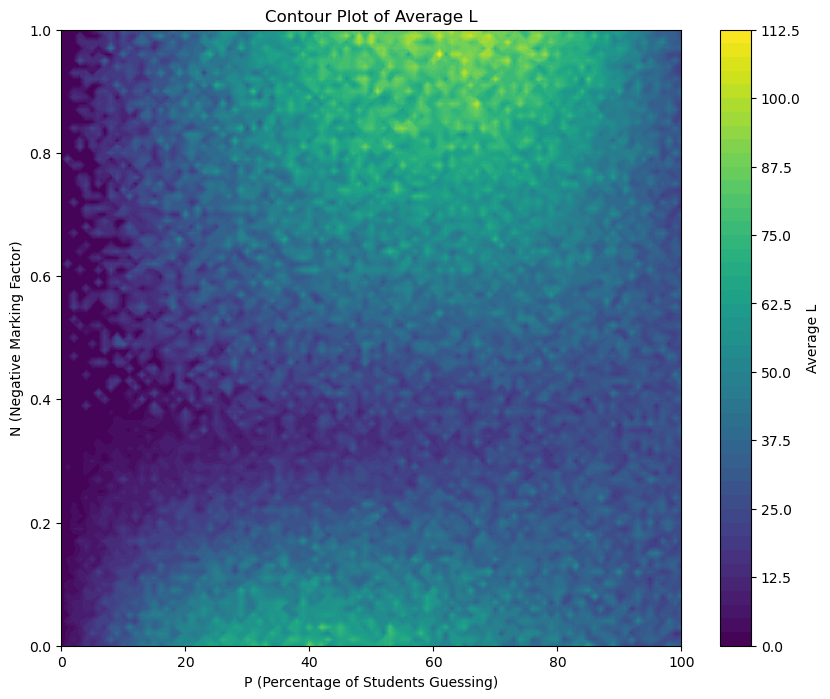

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(321)

# Simulation parameters
num_candidates = 1000
num_selected = 250
num_questions = 200
mean_true_score = 125
std_dev_true_score = 20
num_simulations = 1
P_values = np.linspace(0, 100, 101)  # All values of P between 0 and 100
N_values = np.linspace(0, 1, 101)    # All values of N between 0 and 1

# Function to simulate and compute average L
def simulate_avg_L(P, N):
    L_values = []
    for _ in range(num_simulations):
        true_scores = np.round(np.random.normal(mean_true_score, std_dev_true_score, num_candidates))
        true_scores = np.clip(true_scores, 0, num_questions).astype(int)
        true_scores_sorted = sorted(true_scores, reverse=True)
        H_values = np.random.binomial(1, P / 100, num_candidates)
        A_values = np.random.binomial(num_questions - true_scores, 0.25)
        scores = true_scores + (H_values * A_values) - (H_values * (num_questions - true_scores - A_values) * N)
        scores_sorted = sorted(scores, reverse=True)

        def selected_scores(n, S):
            if S[n] != S[n + 1]:
                return S[:n]
            else:
                return selected_scores(n - 1, S)
        
        selected_scores_true = selected_scores(num_selected, true_scores_sorted)
        selected_scores_list = selected_scores(num_selected, scores_sorted)
        
        L = len([i for i in range(num_candidates) if scores[i] in selected_scores_list and true_scores[i] not in selected_scores_true])
        L_values.append(L)
    
    avg_L = np.mean(L_values)
    return avg_L

# Create meshgrid for P and N values
P_grid, N_grid = np.meshgrid(P_values, N_values)
avg_L_grid = np.zeros(P_grid.shape)

# Compute average L for each combination of P and N
for i in range(P_grid.shape[0]):
    for j in range(P_grid.shape[1]):
        avg_L_grid[i, j] = simulate_avg_L(P_grid[i, j], N_grid[i, j])

# Plot contour plot
plt.figure(figsize=(10, 8))
contour = plt.contourf(P_grid, N_grid, avg_L_grid, cmap='viridis', levels=50)
plt.colorbar(contour, label='Average L')
plt.title('Contour Plot of Average L')
plt.xlabel('P (Percentage of Students Guessing)')
plt.ylabel('N (Negative Marking Factor)')
plt.show()


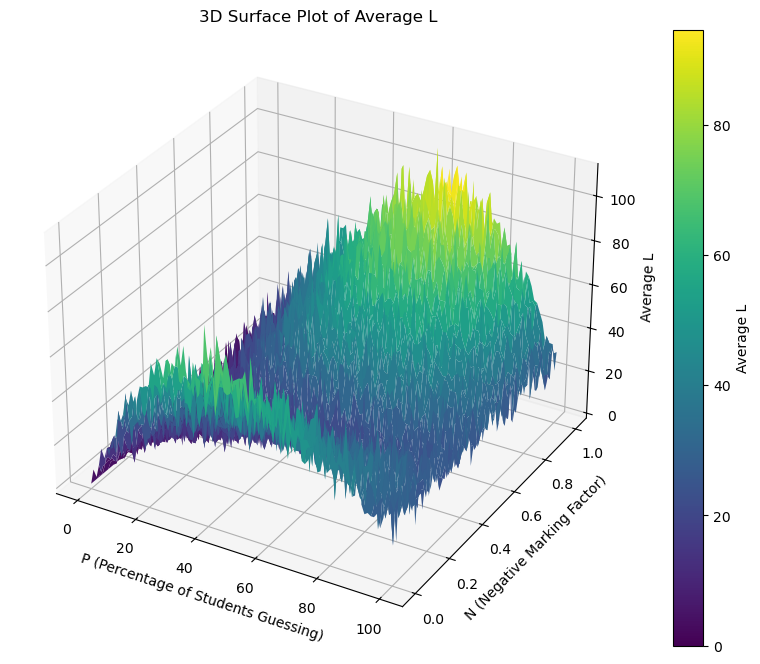

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(321)

# Simulation parameters
num_candidates = 1000
num_selected = 250
num_questions = 200
mean_true_score = 125
std_dev_true_score = 20
num_simulations = 1
P_values = np.linspace(0, 100, 101)  # All values of P between 0 and 100
N_values = np.linspace(0, 1, 101)    # All values of N between 0 and 1

# Function to simulate and compute average L
def simulate_avg_L(P, N):
    L_values = []
    for _ in range(num_simulations):
        true_scores = np.round(np.random.normal(mean_true_score, std_dev_true_score, num_candidates))
        true_scores = np.clip(true_scores, 0, num_questions).astype(int)
        true_scores_sorted = sorted(true_scores, reverse=True)
        H_values = np.random.binomial(1, P / 100, num_candidates)
        A_values = np.random.binomial(num_questions - true_scores, 0.25)
        scores = true_scores + (H_values * A_values) - (H_values * (num_questions - true_scores - A_values) * N)
        scores_sorted = sorted(scores, reverse=True)

        def selected_scores(n, S):
            if S[n] != S[n + 1]:
                return S[:n]
            else:
                return selected_scores(n - 1, S)
        
        selected_scores_true = selected_scores(num_selected, true_scores_sorted)
        selected_scores_list = selected_scores(num_selected, scores_sorted)
        
        L = len([i for i in range(num_candidates) if scores[i] in selected_scores_list and true_scores[i] not in selected_scores_true])
        L_values.append(L)
    
    avg_L = np.mean(L_values)
    return avg_L

# Create meshgrid for P and N values
P_grid, N_grid = np.meshgrid(P_values, N_values)
avg_L_grid = np.zeros(P_grid.shape)

# Compute average L for each combination of P and N
for i in range(P_grid.shape[0]):
    for j in range(P_grid.shape[1]):
        avg_L_grid[i, j] = simulate_avg_L(P_grid[i, j], N_grid[i, j])

# Plot 3D contour plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(P_grid, N_grid, avg_L_grid, cmap='viridis')

# Add labels and title
ax.set_title('3D Surface Plot of Average L')
ax.set_xlabel('P (Percentage of Students Guessing)')
ax.set_ylabel('N (Negative Marking Factor)')
ax.set_zlabel('Average L')
fig.colorbar(surf, ax=ax, label='Average L')

plt.show()
